## Tarea 1 - Máquinas de Aprendizaje

### Integrantes: Gabriel Jara, Daniel San Martín

# 1 Regresión Lineal Ordinaria (LSS)

En esta sección trabajaremos con un dataset conocido como *House Sales in King County*, USA, este se encuentra en Kaggle [1] y contiene los precios en el que se vendieron distintas casas en los Estados Unidos entre Mayo del 2014 y Mayo del 2015. Las casas tienen distintas caracterı́sticas que vienen descritas en el dataset, como la cantidad de habitaciones, cantidad de baños, número de pisos, ubicación geográfica, etc. La variable que nos interesará predecir a partir de los demás atributos será el precio de las casas.

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL adjunta.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

(b) Describa brevemente el dataset utilizar.

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Los datos a utilizar consisten en 21,613 observaciones de 18 variables en total. La primera de estas, "price", corresponde a la variable dependiente, precio de las propiedades que se pretende pronosticar a partir de las variables independientes.

(c) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar esta operación.

In [3]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))

Dado que los datos en las columnas se encuentran en distintas escalas, al momento de aplicar los algoritmos de aprendizaje existirán columnas que ponderarán mucho más y otros muchos menos dada esta diferencia de magnitud. Esta circunstancia perjudica el aprendizaje, puesto que el ajuste de coeficientes se da en magnitudes muy diferentes para cada variable independiente. Es por esta razón que se recomienda a lo menos normalizar la data (ajustar su intervalo), y para algunos modelos de aprendizaje idealmente estandarizar (ajustar la media y la varianza), que es lo que se está haciendo en este caso.

(d) Realice una regresión lineal de mı́nimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.

In [4]:
import sklearn.linear_model as lm

# Regresion lineal
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Por "paso 4" se refiere a la línea de la célula anterior que incerta una columna de unos a $\textbf{X}$. Dado que se usará estandarización de la data, y puesto que el modelo de regresión lineal provisto por sklearn realiza automáticamente normalización cuando está activo el parámetro fit_intercept, es que para evitar normalizar datos que han sido previamente estandarizados que se ha optado por una vía alternativa de tomar en cuenta el intercepto. De esta forma, al disponer de una columna constante e igual a uno, esta nueva variable independiente cumplirá la función del intercepto, correspondiente a los $\beta_0$ en la regresión.

(e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Observa algún problema? Si es ası́, comente y proponga un metodo para eliminar dicho problema.

In [5]:
def sigmaHat(X, y, yhat):
    M, I = X.shape
    return np.sqrt(1./(M - I - 1) * np.sum((y - yhat)**2))

In [6]:
def Zscore(X, y, yhat, beta):
    V = np.linalg.inv(np.dot(X.T, X))
    v = np.diag(V)
    sigh = sigmaHat(X, y, yhat)
    z = beta/(sigh * np.sqrt(v))
    return z

In [7]:
yhat_val = linreg.predict(df_scaled_train)

In [8]:
zs = Zscore(df_scaled_train, ytrain, yhat_val, linreg.coef_)

In [9]:
from scipy import stats
#Studnt, n=999, p<0.05, 2-tail
#equivalent to Excel TINV(0.05,999)
vcrit= stats.t.ppf(1-0.025, df.shape[0]-df.shape[1]-1)

def test(z,vcr):
    if abs(z)-vcrit <0:
        return "No Significativo"
    else:
        return "Significativo"
cotest = []
for z in zs:
    cotest.append(test(z, vcrit))
    

cols = ['b' + str(i) for i in range(18)]
df_sp = pd.DataFrame([linreg.coef_, zs, cotest], index=['coef', 'Z-score', 'test'], columns=cols)

df_sp

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17
coef,-0.00808553,0.0551112,0.0569348,0.0228725,0.0355051,0.0333657,0.042595,0.0463595,0.184577,0.0459367,0.0322648,-0.104759,0.0152659,0.18788,-0.00403123,0.0844123,-0.0071488,13.0335
Z-score,-3.03408,14.656,7.53058e-07,7.59749,12.2699,14.7857,17.3907,20.5368,48.0682,6.82425e-07,8.58665e-07,-33.7906,6.88979,85.7951,-1.58988,23.5687,-2.34678,6307.52
test,Significativo,Significativo,No Significativo,Significativo,Significativo,Significativo,Significativo,Significativo,Significativo,No Significativo,No Significativo,Significativo,Significativo,Significativo,No Significativo,Significativo,Significativo,Significativo


ACÁ TODAVÍA NO TENGO CLARO QUE TENEMOS.

(f) Estime el error de predicción del modelo usando validación cruzada con un número de "folds" igual a $K = 5$ y $K = 10$. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado "fold". Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [10]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))

yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

from sklearn.model_selection import KFold

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

In [11]:
kf = KFold(n_splits=5)
mse_cv = 0
score = 0

for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
    columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_val = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_val.insert(df_cross_val.shape[1], 'intercept', np.ones(df_cross_val.shape[0]))
    yhat_val = linreg.predict(df_cross_val)
    y_val = ym[val]
    mse_fold = np.mean(np.power(yhat_val - y_val, 2))
    score_fold = linreg.score(df_cross_val, y_val)
    mse_cv += mse_fold
    score += score_fold

mse_cv = mse_cv / 5
score = score / 5
print "MSE K=5:", mse_cv
print "R2=%f"%score
print ""

MSE K=5: 0.064701633522
R2=0.766837



In [12]:
kf = KFold(n_splits=10)
mse_cv = 0
score = 0

for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
    columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_val = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_val.insert(df_cross_val.shape[1], 'intercept', np.ones(df_cross_val.shape[0]))
    yhat_val = linreg.predict(df_cross_val)
    y_val = ym[val]
    mse_fold = np.mean(np.power(yhat_val - y_val, 2))
    score_fold = linreg.score(df_cross_val, y_val)
    mse_cv += mse_fold
    score += score_fold

mse_cv = mse_cv / 10
score = score / 10
print "MSE K=10:", mse_cv
print "R2=%f"%score
print ""

MSE K=10: 0.0646829054256
R2=0.766611



In [13]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))
y_test = ytest

yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
score = linreg.score(x_test, y_test)

print "Testing MSE: ", mse_test
print "R2=%f "%score
print ""

Testing MSE:  0.0651691603876
R2=0.763561 



Usando validación cruzada fue posible obtiener una estimación adecuada del error real del modelo, en torno a 0.065. También permitió estimar el coeficente $R^2$ que fue de 0.76. 

(j) Mida los errores de predicción para cada dato de entrenamiento. Utilizando un "quantile-quantile plot" determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

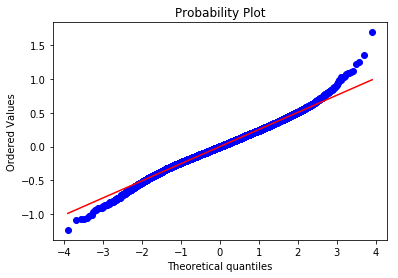

In [14]:
import pylab 
import scipy.stats as stats

# Prediccion datos de entrenamiento
yhat = linreg.predict(df_scaled_train)

# Calculo de error
error = yhat - ytrain

# Grafico
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

A partir del análisis sobre la gráfica *"quantile-quantile plot"* se observa que, para la mayor parte del dominio de las observaciones, la distribución del valor residual se comporta similar a la distribución normal. Esto no se cumple, sin embargo, para los valores extremos de residuo, siendo el error absoluto mayor al esperado (de acuerdo a la distribución normal) en los casos extremos. 

(h) Se generan dos muestreos de datos donde el valor de sus etiqueta siguen distribuciones distintas: Genere dos modelos, evalue y compare sus comportamientos.

In [20]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)

for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    #frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
    frames.append(df[(valor >= z) & (valor < z+0.5)].head(500))
    
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = np.log(df_A.price)
X_B = df_B.iloc[:,1:].values
y_B = np.log(df_B.price)

from sklearn.model_selection import train_test_split
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

Xtrain_A = pd.DataFrame(Xtrain_A)
Xval_A = pd.DataFrame(Xval_A)

scaler = StandardScaler()
df_scaled_train_A = pd.DataFrame(scaler.fit_transform(Xtrain_A), columns=Xtrain_A.columns)
df_scaled_train_A.insert(df_scaled_train_A.shape[1], 'intercept', np.ones(df_scaled_train_A.shape[0]))

df_scaled_test_A = pd.DataFrame(scaler.fit_transform(Xval_A),columns=Xval_A.columns)
df_scaled_test_A.insert(df_scaled_test_A.shape[1], 'intercept', np.ones(df_scaled_test_A.shape[0]))

In [22]:
linregA = lm.LinearRegression(fit_intercept = False)
linregA.fit(df_scaled_train_A, ytrain_A)
yhatA = linreg.predict(df_scaled_test_A)
mseA = np.mean(np.power(yhatA - yval_A, 2))
score = linreg.score(df_scaled_test_A, yval_A)

print "MSE A:", mseA
print "R2=%f "%score
print ""

MSE A: 0.0639798582781
R2=0.737996 



In [18]:
from sklearn.preprocessing import StandardScaler

Xtrain_B = pd.DataFrame(Xtrain_B)
Xval_B = pd.DataFrame(Xval_B)

scaler = StandardScaler()
df_scaled_train_B = pd.DataFrame(scaler.fit_transform(Xtrain_B), columns=Xtrain_B.columns)
df_scaled_train_B.insert(df_scaled_train_B.shape[1], 'intercept', np.ones(df_scaled_train_B.shape[0]))

df_scaled_test_B = pd.DataFrame(scaler.fit_transform(Xval_B),columns=Xval_B.columns)
df_scaled_test_B.insert(df_scaled_test_B.shape[1], 'intercept', np.ones(df_scaled_test_B.shape[0]))

In [19]:
linregB = lm.LinearRegression(fit_intercept = False)
linregB.fit(df_scaled_train_B, ytrain_B)
yhatB = linreg.predict(df_scaled_test_B)
mseB = np.mean(np.power(yhatB - yval_B, 2))
score = linreg.score(df_scaled_test_B, yval_B)

print "MSE B:", mseB
print "R2=%f "%score
print ""

MSE B: 0.220183481353
R2=0.715787 



Se observa que de las dos muestras, la que fue construida aleatoriamente permitió generar un modelo de comportamiento similar al que se habría obtenido con toda la data de entrenamiento. Por otra parte, al forzar un muestreo homogéneamene distribuido sobre el dominio de la variable dependiente se produce un claro deterioro del error real del modelo y del coeficiente $R^2$ medido sobre la data de testeo. Esto es reflejo de que la nueva muestra no representa realmente el comportamiento de la mayoría de las observaciones, dando lugar a que registros poco frecuentes sean tratados con la misma ponderación que aquellos más comunes. 

---

# 2 Selección de Atributos

Utilizando el dataframe de la actividad anterior,

(a) Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

In [20]:
import matplotlib.pyplot as plt

def plot_error(x, error_training, error_testing):
    plt.figure(figsize=(10, 6))
    plt.plot(x, error_training, label="Training Error")
    plt.plot(x, error_testing, label="Testing Error")
    plt.grid(True)
    plt.legend()
    plt.xlabel("N de variables")
    plt.ylabel("MSE")
    plt.show()

In [21]:
def fss(x, y, xt, yt, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    
    # Variables ara el grafico
    mse_tr = []
    mse_te = []
    
    while remaining and len(selected)<=k :
        score_candidates = []
        tmp_test = []

        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]            
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            #score_candidates.append((mse_candidate, candidate))
            
            # Testing error
            prediction_test = model.predict(xt[:,indexes])
            residuals_test = prediction_test - yt
            mse_test_candidates = np.mean(np.power(residuals_test, 2))
            score_candidates.append((mse_candidate, candidate, mse_test_candidates))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate, test_score = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
        
        # Guardar errores de training y testing
        mse_tr.append(best_new_score)
        mse_te.append(test_score)
        
    # Grafico de errores
    plot_error(np.arange(1, 1 + len(mse_tr)), mse_tr, mse_te)
    
    return selected

selected = grade ...
totalvars=2, mse = 0.143260
selected = lat-long ...
totalvars=3, mse = 0.103340
selected = sqft_living ...
totalvars=4, mse = 0.084960
selected = yr_built ...
totalvars=5, mse = 0.075447
selected = view ...
totalvars=6, mse = 0.071782
selected = sqft_lot15 ...
totalvars=7, mse = 0.069979
selected = bathrooms ...
totalvars=8, mse = 0.068251
selected = condition ...
totalvars=9, mse = 0.066864
selected = waterfront ...
totalvars=10, mse = 0.065836
selected = floors ...
totalvars=11, mse = 0.065107
selected = sqft_lot ...
totalvars=12, mse = 0.064820
selected = yr_renovated ...
totalvars=13, mse = 0.064619
selected = bedrooms ...
totalvars=14, mse = 0.064583
selected = sqft_basement ...
totalvars=15, mse = 0.064554
selected = intercept ...
totalvars=16, mse = 0.064527
selected = sqft_living15 ...
totalvars=17, mse = 0.064516
selected = sqft_above ...
totalvars=18, mse = 0.064516


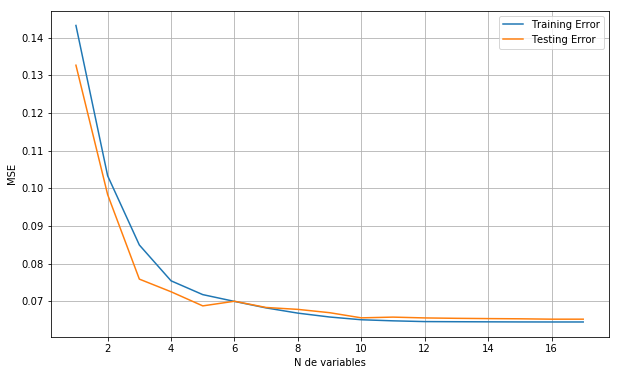

Selected [17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 10, 16, 14, 9]


In [22]:
# Training data
Xm = df_scaled_train.as_matrix()
Ym = ytrain.as_matrix()

# Testing data
Xt = x_test.as_matrix()
yt = ytest.as_matrix()

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",                     
    "condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long", 
    "sqft_living15","sqft_lot15","intercept"]

sel = fss(Xm, Ym, Xt, yt, names_regressors)
print "Selected", sel

Propuesta: utilizar Kfold cross validation y usar el ajuste $R^2$ como criterio

Numero optimo de features : 18
Scores:  [ -4.29662288e-04   4.74027093e-01   6.45319084e-01   6.93728531e-01
   7.28060065e-01   7.36463080e-01   7.43117174e-01   7.53746990e-01
   7.58712623e-01   7.61709056e-01   7.65012985e-01   7.65001823e-01
   7.65001823e-01   7.66041194e-01   7.66714770e-01   7.66757685e-01
   7.66747844e-01   7.66879405e-01]


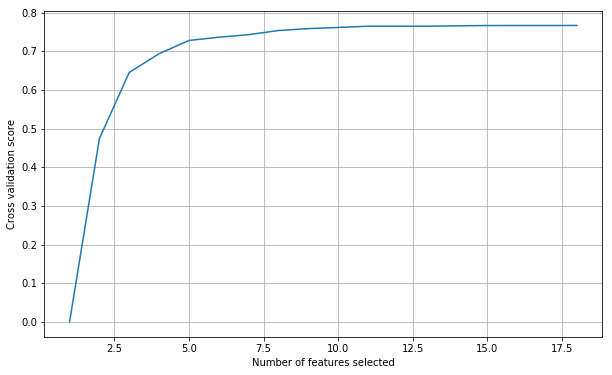

In [23]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Linear regression
linreg = lm.LinearRegression(fit_intercept=False)

# Uso de seleccion de caracteristicas de sklearn
rfecv = RFECV(estimator=linreg, step=1, cv=KFold(5), scoring='r2')
rfecv.fit(Xm, ym)

print("Numero optimo de features : %d" % rfecv.n_features_)
print "Scores: ", rfecv.grid_scores_

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(np.arange(1, 1 + len(rfecv.grid_scores_)), rfecv.grid_scores_)
plt.grid(True)
plt.show()

In [24]:
## Esto no funciona
from sklearn.model_selection import KFold

def fssFold(xx, y, names_x, folds = 5, k = 10000):
    p = xx.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    
    # Variables ara el grafico
    mse_tr = []
    mse_te = []
    
    while remaining and len(selected)<=k :
        score_candidates = []
        tmp_test = []

        for candidate in remaining:
            
            kf = KFold(n_splits=folds)
            mse_train_cv = 0
            mse_cv = 0

            indexes = selected + [candidate]
            #x = x[:,:-1]
            #x = xx[:,indexes[1:]]
            x = xx[:,indexes]
            
            #print names_x[indexes[1:]]
            
            for train, val in kf.split(x):
                
                #x_train = x[:,indexes] 
                #x = x[:,indexes[1:]]
                #print train
                
                cross_scaler = StandardScaler().fit(x[train])
                df_cross_train = pd.DataFrame(cross_scaler.transform(x[train]),
                    columns=names_x[indexes])
                df_cross_train.insert(df_cross_train.shape[1], 'intercept',
                    np.ones(df_cross_train.shape[0]))
                linreg = lm.LinearRegression(fit_intercept = False)
                
                # Training
                predictions_train = linreg.fit(df_cross_train, y[train]).predict(df_cross_train)
                residuals_train = predictions_train - y[train]
                mse_train_fold = np.mean(np.power(residuals_train, 2))
                mse_train_cv += mse_train_fold
                
                # Testing
                df_cross_test = pd.DataFrame(cross_scaler.transform(x[val]),columns=names_x[indexes])
                df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
                yhat_val = linreg.predict(df_cross_test)
                mse_fold = np.mean(np.power(yhat_val - y[val], 2))
                mse_cv += mse_fold

            mse_train_cv / folds
            mse_cv = mse_cv / folds

            score_candidates.append((mse_train_cv, candidate, mse_cv))
  
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate, test_score = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
        
        # Guardar errores de training y testing
        mse_tr.append(best_new_score)
        mse_te.append(test_score)
        
    # Grafico de errores
    plot_error(np.arange(len(mse_tr)), mse_tr, mse_te)
    
    return selected

In [25]:
Xm = Xtrain.as_matrix()
Ym = ytrain.as_matrix()

print Xm.shape

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",                     
    "condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long", 
    "sqft_living15","sqft_lot15"]#, "intercept"]

sel = fssFold(Xm, Ym, names_regressors)
print "Selected", sel

(15129, 17)


IndexError: index 16 is out of bounds for axis 1 with size 16

---

# 3 Regularización

Utilizando el dataframe de la actividad anterior,

(a) Ajuste un modelo lineal utilizando "Ridge Regression", es decir, regularizando con la norma $\ell_2$. Utilice
valores del parámetro de regularización $\lambda^{‡}$ en el rango $[10^4 , 10^{−1}]$. Construya un gráfico que muestre los
coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (**Hint**:
Note que la lı́nea 4 y el primer argumento en la lı́nea 12 son crı́ticos).

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

In [32]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

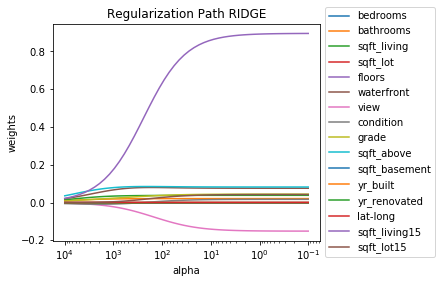

In [33]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

X_c = X.copy()
#X_c = X_c.drop('intercept', axis=1)
Xtrain = X_c[istrain]
ytrain = y[istrain]
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
    
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')

plt.legend(loc=2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

$^{‡}$ Se asume la siguiente formulación: $\min_w ||\textbf{Y} - \textbf{Xw}||^2 + \lambda ||\textbf{w}||^2$.

(b) Ajuste un modelo lineal utilizando el método "Lasso", es decir, regularizando con la norma $\ell_1$. Utilice valores del parámetro de regularización $\lambda^{§}$ en el rango $[10^1 ,10^{−2}]$. Para obtener el código, modifique las lı́neas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para seleccionar atributos?

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


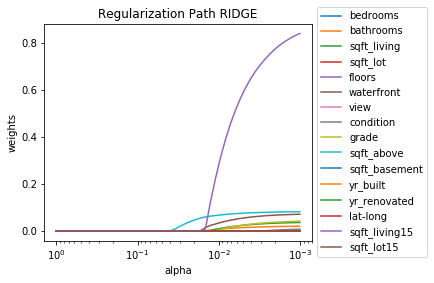

In [34]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt

X_c = X.copy()
#X_c = X_c.drop('intercept', axis=1)
Xtrain = X_c[istrain]
ytrain = y[istrain]
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True, max_iter=10000) ##Aumenté las iteraciones para que converja

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
    
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')

plt.legend(loc=2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

$^{§}$ Se asume la siguiente formulación: $\min_w \frac12 ||\textbf{Y} - \textbf{Xw}||^2 + \lambda ||\textbf{w}||_{\ell_1}$.

(c) Utilizando "Ridge Regression", construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de regularización. Discuta lo que observa.

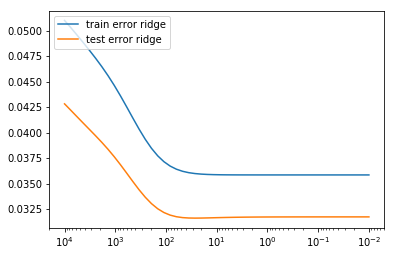

In [35]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
#Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(4,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

(d) Utilizando "Lasso", construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de regularización. Discuta lo que observa.

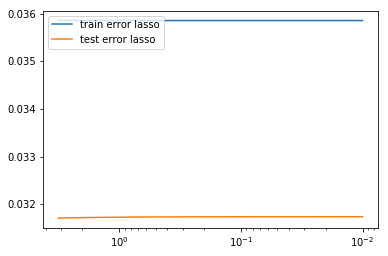

In [36]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
#Xtest = Xtest.drop('intercept', axis=1)
alphas_ = alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

(e) Estime el valor del parámetro de regularización en los métodos anteriores usando validación cruzada.

In [37]:
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn import cross_validation

k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in k_fold]
    
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


BEST PARAMETER=3.162278, MSE(CV)=0.056168
BEST PARAMETER=2.811769, MSE(CV)=0.056143
BEST PARAMETER=2.500110, MSE(CV)=0.056120
BEST PARAMETER=2.222996, MSE(CV)=0.056098
BEST PARAMETER=1.976598, MSE(CV)=0.056080
BEST PARAMETER=1.757511, MSE(CV)=0.056066
BEST PARAMETER=1.562707, MSE(CV)=0.056055
BEST PARAMETER=1.389495, MSE(CV)=0.056046
BEST PARAMETER=1.235483, MSE(CV)=0.056039
BEST PARAMETER=1.098541, MSE(CV)=0.056033
BEST PARAMETER=0.976778, MSE(CV)=0.056029
BEST PARAMETER=0.868511, MSE(CV)=0.056025
BEST PARAMETER=0.772245, MSE(CV)=0.056022
BEST PARAMETER=0.686649, MSE(CV)=0.056020
BEST PARAMETER=0.610540, MSE(CV)=0.056018
BEST PARAMETER=0.542868, MSE(CV)=0.056016
BEST PARAMETER=0.482696, MSE(CV)=0.056015
BEST PARAMETER=0.429193, MSE(CV)=0.056011
BEST PARAMETER=0.381621, MSE(CV)=0.055967
BEST PARAMETER=0.339322, MSE(CV)=0.055910
BEST PARAMETER=0.301711, MSE(CV)=0.055864
BEST PARAMETER=0.268270, MSE(CV)=0.055828
BEST PARAMETER=0.238534, MSE(CV)=0.055799
BEST PARAMETER=0.212095, MSE(CV)=0

# 4 Predicción de Utilidades de Películas

El problema a resolver en esta sección consiste en predecir el volumen de utilidades (en dólares) obtenidas por el estreno (al público, en USA) de una pelı́cula. Especı́ficamente consideraremos dos posibles respuestas: el volumen total de utilidades (total revenue) obtenido durante el fin de semana del estreno y el volumen de utilidades por lugar de proyección (per screen revenue). Los datos a utilizar fueron recolectados en un estudio publicado recientemente por M. Joshi y colegas de la universidad de Carnegie Mellon [3], y corresponden a 1718 pelı́culas realizadas entre 2005 y 2009. Cada pelı́cula, se representa utilizando diversos tipos de atributos

1. Texto: A partir de las crı́ticas publicadas para cada pelı́cula (en diversos sitios y antes del estreno), se construyen caracterı́sticas que corresponden a la frecuencia de palabras, parejas de palabras y trı́os de palabras obtenidas de un vocabulario.
2. Metadata: (1) Variable binaria que indica si el lugar de origen de la pelı́cula es USA, (2) logaritmo del presupuesto, (3) número de puntos de proyección, (4) género (acción, drama, comedia, etc), (5) Calificación de la MPAA (mayores de catorce, todo espectador, etc), (6) Variable binaria que indica si el estreno se produjo durante un feriado/vacaciones y (7) Número de actores con OSCAR.

Los datos pueden ser descargados ejecutando los siguientes comandos en un terminal (sistemas UNIX)

```
wget http://www.inf.utfsm.cl/~cvalle/movies.tar.gz
tar -xzvf movies.tar.gz
rm movies.tar.gz
```

Para facilitar el trabajo, los datos han sido ya preparados en formato matricial. Concretamente usted dispondrá de tres parejas de archivos ($\textbf{X}$ e $y$): un conjunto de datos de entrenamiento (```train.x.nm``` y ```train.y.dat```), un conjunto de datos de validación para evitar tener que hacer validación cruzada (```dev.x.nm``` y ```dev.y.dat```) y un conjunto de datos de pruebas (```test.x.nm``` y ```test.y.dat```) que, naturalmente, no puede utilizar para construir el modelo. Se incluirán además, dos versiones de los datos. Una de ellas consiste en remover la variable que indica la presencia de actores con OSCAR del conjunto de atributos.

El archivo de respuestas ($y$) contiene un dato por fila en el orden correspondiente a las $x$. El archivo con
los atributos ($x$) está codificado en formato sparse de matrix market [5] como sigue. La cabecera del archivo
pueden aparecer 0, 1 o más comentarios (filas que inician con %). La linea siguiente indica el número de filas,
columnas y entradas no nulas de la matriz. Las lı́neas que siguen tienen la estructura ($i, j, \textbf{X}_{ij}$), es decir indican la fila y columna de la matriz que contiene el tercer elemento. Por ejemplo:

```
%%MatrixMarket matrix coordinate real general
317 145256 658516
1 9 14.0
1 12 1.0
```

(a) Lea los archivos de datos y cárguelos en dos dataframe o matrices $\textbf{X}$, $y$. En el caso de $\textbf{X}$ es extremadamente importante que mantenga el formato disperso (sparse) (¿porqué?). Si trabaja con matrices use matrices dispersas del tipo ```csr matrix``` o ```csc matrix```. Si prefiere operar sobre un dataframe, puede utilizar los (recientemente introducidos) dataframe dispersos de pandas: *SparseDataFrame*, aunque todavı́a no se tiene una operabilidad completa.

Se necesita conservar un formato disperso que resulte adecuado a la representación vectorial de n-gramas provenientes de texto natural, que recoje la presencia de palabras o conjuntos de palabras en un documento. Este tipo de datos da origen a gran cantidad de dimensiones donde son muy pocas las observaciones que originan valores distintos de cero.

In [24]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.io import mmread

X_train = csr_matrix(mmread('data/train.x.mm'))
y_train = np.loadtxt('data/train.y.dat')

X_val = csr_matrix(mmread('data/dev.x.mm'))
y_val = np.loadtxt('data/dev.y.dat')

X_test = csr_matrix(mmread('data/test.x.mm'))
y_test = np.loadtxt('data/test.y.dat')

(b) Construya un modelo lineal que obtenga un coeficiente de determinación (sobre el conjunto de pruebas) de al menos 0.75. A partir de un modelo lineal de *sklearn*, el coeficiente de determinación se obtiene fácilmente

In [25]:
import sklearn.linear_model as lm

model = lm.LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

print "R2=%f"%model.score(X_test, y_test)

y_hat = model.predict(X_test)
mse = np.mean(np.power(y_hat - y_test, 2))
print "Testing MSE: ", mse

R2=0.590314
Testing MSE:  1.95097770142e+14


Se obtiene en primera instancia, utiliando regresión lineal, un modelo predictivo que logra ajustar con coeficiente $R^2$ de 0.59, medido en la muestra de testeo. 

Se procederá a continuación a estandarizar la data. Sin embargo, no es posible centrar a media cero matrices dispersas como las que se está trabajando, por lo que solamente se escalará la varianza de las variables independientes, y se tomará el logaritmo de la variable dependiente. Esta transformación debiera ser suficiente para hacer comparables las dimensiones, lo cual es muy necesario si se va a utilizar algoritmos que incorporan parámetro de regularización. Pero antes de eso se probará el efecto de haber estandarizado la varianza con regresión linea.  

In [26]:
import sklearn.preprocessing as sp

X_train = sp.scale(X_train, with_mean=False)
y_train = np.log(y_train)

X_test = sp.scale(X_test, with_mean=False)
y_test = np.log(y_test)

X_val = sp.scale(X_val, with_mean=False)
y_val = np.log(y_val)

In [27]:
import sklearn.linear_model as lm
import sklearn.preprocessing as sp

model = lm.LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

print "R2=%f"%model.score(X_test, y_test)

y_hat = model.predict(X_test)
mse = np.mean(np.power(y_hat - y_test, 2))
print "Testing MSE: ", mse

R2=-0.794362
Testing MSE:  19.9592487625


El resultado de la estandarización fue malo para el modelo de regresión lineal. Cabe notar que el error se redujo producto de la transformación logaritmica, no por un mejor desempeño del modelo De hecho el coeficiente R2 observado es incluso negativo. 

Siendo el problema de naturaleza *sparse*, se estima que el algoritmo que debiera ser más adecuado es Lasso, debido a que propende a tener pocos coeficientes distintos de cero, lo cual hace que el modelo resultante se pueda concentrar en menos dimensiones. A continuación se prueba Lasso para diversos valores de $\alpha$, cuyos resultados se mediran para utilizando la muestra de validación (no de testing).  

In [28]:
from sklearn.linear_model import Lasso

alpha = np.arange(0.1,1, 0.1)

for a in alpha: 
    model = Lasso(alpha=a)
    y_hat = model.fit(X_train, y_train).predict(X_val)
    #print(model)
    print "Alpha: " +str(a)
    print "R2=%f"%model.score(X_val, y_val)
    print ""

Alpha: 0.1
R2=0.854932

Alpha: 0.2
R2=0.848952

Alpha: 0.3
R2=0.835352

Alpha: 0.4
R2=0.819484

Alpha: 0.5
R2=0.803083

Alpha: 0.6
R2=0.783578

Alpha: 0.7
R2=0.764874

Alpha: 0.8
R2=0.746571

Alpha: 0.9
R2=0.726266



Dado que se encontró el mejor desempeño para $\alpha = 0.1$, se buscará en la vecindad de dicho valor un mejor resultado. 

In [29]:
alpha = np.arange(0.01,0.15, 0.01)

for a in alpha: 
    model = Lasso(alpha=a)
    y_hat = model.fit(X_train, y_train).predict(X_val)
    #print(model)
    print "Alpha: " +str(a)
    print "R2=%f"%model.score(X_val, y_val)
    print ""

Alpha: 0.01
R2=0.838640

Alpha: 0.02
R2=0.841472

Alpha: 0.03
R2=0.847470

Alpha: 0.04
R2=0.851049

Alpha: 0.05
R2=0.852465

Alpha: 0.06
R2=0.852799

Alpha: 0.07
R2=0.853543

Alpha: 0.08
R2=0.854480

Alpha: 0.09
R2=0.855038

Alpha: 0.1
R2=0.854932

Alpha: 0.11
R2=0.855043

Alpha: 0.12
R2=0.855012

Alpha: 0.13
R2=0.854960

Alpha: 0.14
R2=0.854563



Se observa que el mejor coeficiente $R^2$ se obtiene con $\alpha = 0.11$, por lo que se procede a continuación a evaluar e desempeño de dicho modelo en la muestra de testeo. 

In [30]:
from sklearn.linear_model import Lasso

alpha = 0.11
model = Lasso(alpha=alpha)

y_hat = model.fit(X_train, y_train).predict(X_test)
print(model)
print "Testing R2=%f"%model.score(X_test, y_test)

y_hat = model.predict(X_test)
mse = np.mean(np.power(y_hat - y_test, 2))
print "Testing MSE: ", mse

Lasso(alpha=0.11, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Testing R2=0.849869
Testing MSE:  1.66995406871


De esta forma, utilizando Lasso, se llega finalmente a un ajuste observado del coeficiente $R^2$ de 0.85. 

# References

* [1] https://www.kaggle.com/harlfoxem/housesalesprediction
* [2] Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition. Springer New York Inc.
* [3] Joshi, M., Das, D., Gimpel, K., Smith, N. A. (2010). Movie reviews and revenues: An experiment in text regression. In the 2010 Annual Conference of the North American Chapter of the Association for Computational Linguistics (pp. 293-296). Association for Computational Linguistics.
* [4] https://www.dropbox.com/sh/8r1wrblyfokwuq0/AABUEvgcuMxyZht2-KYyBptUa?dl=0
* [5] http://math.nist.gov/MatrixMarket/formats.html